# Vehicle Data Analysis and Visualization
In this lab I will be analysing data from a traffic violation document. This document contains information about the car, the vialations, the date, and more. I will be picking out select data and forming it into a data frame. I will aslo be making five different graphs that each show their own information about this document.

## Import and set up document for future use

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
file_name = "vehicles_data.csv"
df = pd.read_csv(file_name, encoding="ISO-8859-1")

C:\Users\Magan\AppData\Local\Temp\ipykernel_93708\2875800517.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, encoding="ISO-8859-1")


In [106]:
df.head(10)

,Date Of Stop,Time Of Stop,Description,Location,VehicleType,Year,Make,Model,Color,Violation Type,Race,Gender,Price
0,9/30/14,23:51:00,DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,PARK RD AT HUNGERFORD DR,02 - Automobile,2014.0,FORD,MUSTANG,BLACK,Citation,BLACK,M,7949.0
1,3/31/15,23:59:00,HEADLIGHTS (*),CONNECTICUT AT METROPOLITAN AVE,02 - Automobile,2003.0,HONDA,2S,BLUE,ESERO,HISPANIC,M,3022.0
2,9/30/14,23:30:00,FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHE...,OBSERVATION @ RIDGE ROAD,02 - Automobile,2009.0,TOYOTA,CAMRY,RED,Warning,BLACK,F,4939.0
3,3/31/15,23:59:00,DRIVER FAILURE TO STOP AT STOP SIGN LINE,W/B PLYERS MILL RD AT METROPOLITAN AVE,02 - Automobile,2007.0,ACURA,MDX,BLACK,Warning,WHITE,F,4105.0
4,3/31/15,23:58:00,STOP LIGHTS (*),2355 NB AT BATTERY LN,02 - Automobile,2003.0,NISSAN,MURANO,SILVER,ESERO,OTHER,M,3000.0
5,3/31/15,23:58:00,DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQU...,EB BEL PRE RD / LAYHILL RD,02 - Automobile,2007.0,HONDA,CIVIC,SILVER,Citation,WHITE,F,4622.0
6,3/31/15,23:58:00,DRIVING VEHICLE ON HIGHWAY WITH AN EXPIRED LIC...,EB BEL PRE RD / LAYHILL RD,02 - Automobile,2007.0,HONDA,CIVIC,SILVER,Citation,WHITE,F,3622.0
7,3/31/15,23:58:00,FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...,EB BEL PRE RD / LAYHILL RD,02 - Automobile,2007.0,HONDA,CIVIC,SILVER,Citation,WHITE,F,5122.0
8,3/31/15,23:58:00,FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,EB BEL PRE RD / LAYHILL RD,02 - Automobile,2007.0,HONDA,CIVIC,SILVER,Citation,WHITE,F,4622.0
9,3/31/15,23:58:00,PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,EB BEL PRE RD / LAYHILL RD,02 - Automobile,2007.0,HONDA,CIVIC,SILVER,Citation,WHITE,F,4122.0


## Get the 6th newest vehicle year and its price

In [107]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
sixth_max = df.nlargest(6, columns=['Year', 'Price']).iloc[-1]
sixth_max

Date Of Stop                                                 8/3/13
Time Of Stop                                               22:38:00
Description       NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...
Location                                AIRPARK RD / SHADY GROVE RD
VehicleType                                         01 - Motorcycle
Year                                                         9999.0
Make                                                       KAWASAKI
Model                                                         NINJA
Color                                                         BLACK
Violation Type                                             Citation
Race                                                          BLACK
Gender                                                            F
Price                                                     3202441.0
Name: 397833, dtype: object

## Get the 4th oldest vehicle year and its price

In [108]:
fourth_min = df.nsmallest(4, columns=['Year', 'Price']).iloc[-1]
fourth_min

Date Of Stop                                                4/26/15
Time Of Stop                                                0:16:00
Description       FAILURE TO EQUIP HWY. VEH. WITH REQUIRED LAMPS...
Location                              FREDERICK RD @ MIDDLEBROOK RD
VehicleType                                         02 - Automobile
Year                                                            0.0
Make                                                          VOLVO
Model                                                           S60
Color                                                         BLACK
Violation Type                                              Warning
Race                                                          BLACK
Gender                                                            F
Price                                                         500.0
Name: 21186, dtype: object

## Get the number of missing values

In [109]:
nan_count = df.isnull().sum().sum()
nan_count

np.int64(26250)

## Put all information into a data frame and save it as CSV

In [110]:
dic = {'6th Newest Year': [sixth_max['Year']],
          '6th Newest Price': [sixth_max['Price']],
          '4th Oldest Year': [fourth_min['Year']],
          '4th Oldest Price': [fourth_min['Price']],
          '# Missing Values': [nan_count]}
new_df = pd.DataFrame(dic)
new_df

,6th Newest Year,6th Newest Price,4th Oldest Year,4th Oldest Price,# Missing Values
0,9999.0,3202441.0,0.0,500.0,26250


In [111]:
new_df.to_csv("DataAnalysis.csv")

# Create 5 Graphs

In this section I will be creating 5 unique graphs that all show different information about the document.

## 1) Bar Graph

This graph shows the top five vehicle models used.

In [112]:
# save the top five used vehicle models in a list
model_list = df['Model'].value_counts()[:5]
model_list

Model
4S        93161
TK        53307
ACCORD    28948
CIVIC     26607
CAMRY     26084
Name: count, dtype: int64

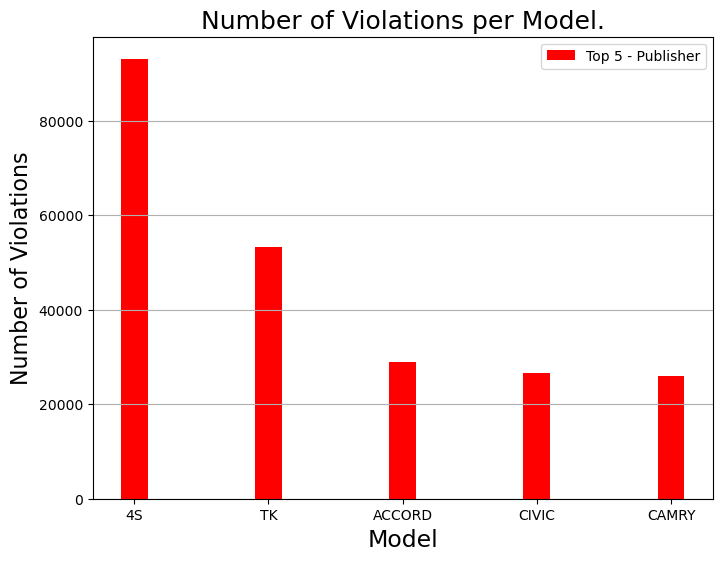

In [117]:
# create figure
plt.figure(figsize=(8,6))

# generate the axes
x_list = model_list.index
y_list = model_list.to_list()

# generate the bars
plt.bar(x_list, y_list, width=.2, color='red', align='center', label='Top 5 - Publisher')

# add labels
plt.legend()
plt.title('Number of Violations per Model.',fontsize=18)
plt.xlabel('Model',fontsize=17)
plt.ylabel('Number of Violations',fontsize=16)
plt.grid(axis='y')

# save image
plt.savefig('BarGraph.png')

# show image
plt.show()

## 2) Pie Graph

This graph will show the frequency of the top ten colors of the vehicles in this document.

In [11]:
# check uniques
df['Color'].describe()

count     792950
unique        30
top        BLACK
freq      159407
Name: Color, dtype: object

In [95]:
# get the count of each unique color
color_counts = df['Color'].value_counts()[:10]
color_counts

Color
BLACK         159407
SILVER        146733
WHITE         120076
GRAY           86045
RED            63752
BLUE           58965
GREEN          31838
GOLD           26291
TAN            18168
BLUE, DARK     17196
Name: count, dtype: int64

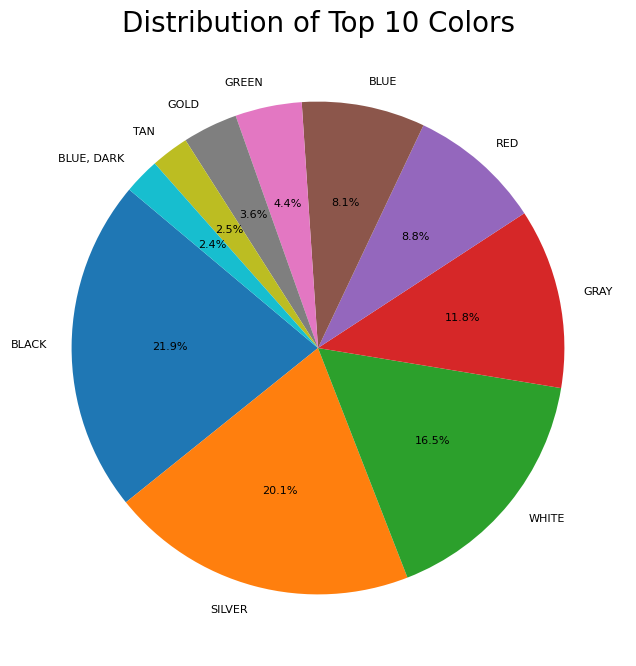

In [118]:
# create the figure
plt.figure(figsize=(8,8))

# get the lists
colors = color_counts.keys()
unique_color_count = [color for color in color_counts]

# create the pie chart
plt.pie(unique_color_count, labels=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize':8})
plt.title('Distribution of Top 10 Colors', fontsize =20)

# save the image
plt.savefig('PieGraph.png')

# show image
plt.show()

## 3) Scatter Plot

This graph shows the top six races and their number of citations.

In [15]:
# check uniques
df['Race'].describe()

count     803060
unique       489
top        WHITE
freq      293405
Name: Race, dtype: object

In [21]:
# get the top 6 unique races and their counts
race_list = df['Race'].value_counts()[:6]
race_list

Race
WHITE              293405
BLACK              250510
HISPANIC           167367
ASIAN               47373
OTHER               41290
NATIVE AMERICAN      2286
Name: count, dtype: int64

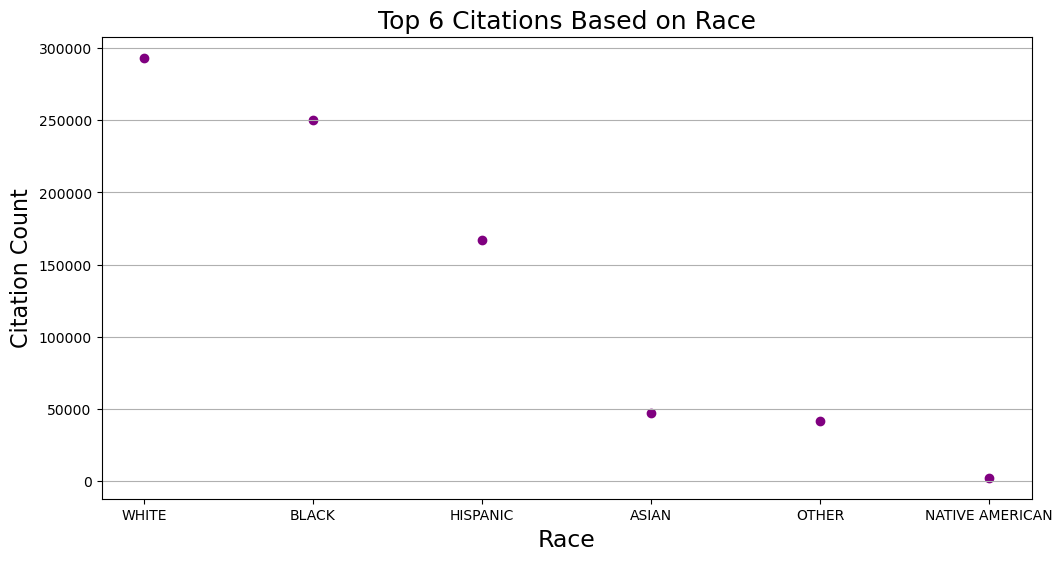

In [119]:
# create figure
plt.figure(figsize=(12,6))

# create the axes
x_list = race_list.index
y_list = race_list.to_list()

# create the scatter dots
plt.scatter(x_list, y_list, color='purple')

# create the labels
plt.title('Top 6 Citations Based on Race',fontsize=18)
plt.xlabel('Race',fontsize=17)
plt.ylabel('Citation Count',fontsize=16)
plt.grid(axis='y')

# save the image
plt.savefig('ScatterGraph.png')

# show image
plt.show()

# 4) Line Graph

This graph shows the top 10 price based on the make of the car.

In [55]:
# get unique makes
make_price = df['Make'].value_counts()[:10]
make_price

Make
TOYOTA    88623
HONDA     83634
FORD      75452
TOYT      46458
NISSAN    41659
HOND      31499
CHEV      25197
BMW       22154
DODGE     21050
CHEVY     18653
Name: count, dtype: int64

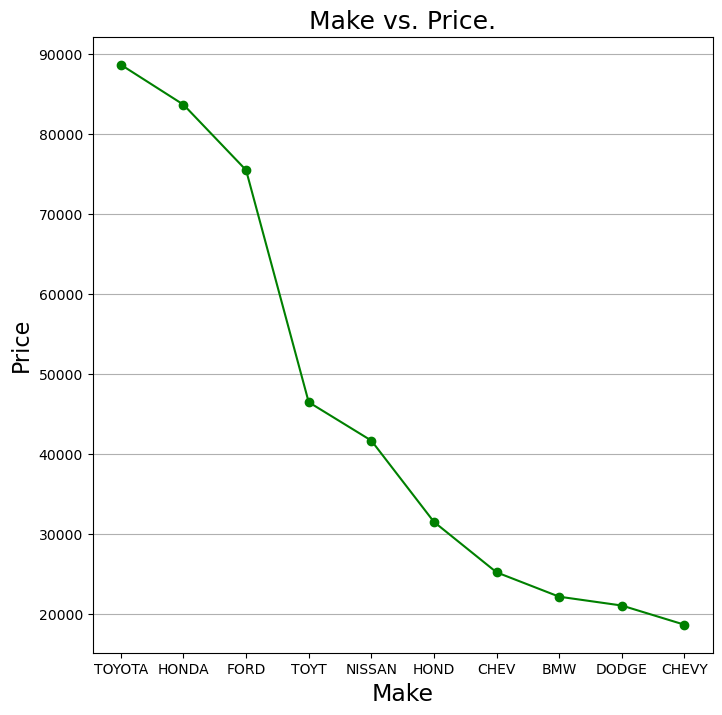

In [120]:
# create figure
plt.figure(figsize=(8,8))

# create the axes
x_list = make_price.index
y_list = make_price.to_list()

# create the line
plt.plot(x_list, y_list, color='green', marker='o')

# create the labels
plt.title('Make vs. Price.',fontsize=18)
plt.xlabel('Make',fontsize=17)
plt.ylabel('Price',fontsize=16)
plt.grid(axis='y')

# save the image
plt.savefig('LineGraph.png')

# show image
plt.show()

## 5) Histogram

This graph shows the frequency of the top ten times that people got a violation.

In [88]:
# get the top ten times
time_stop = df['Time Of Stop'].to_list()[:10]
time_stop

['23:51:00',
 '23:59:00',
 '23:30:00',
 '23:59:00',
 '23:58:00',
 '23:58:00',
 '23:58:00',
 '23:58:00',
 '23:58:00',
 '23:58:00']

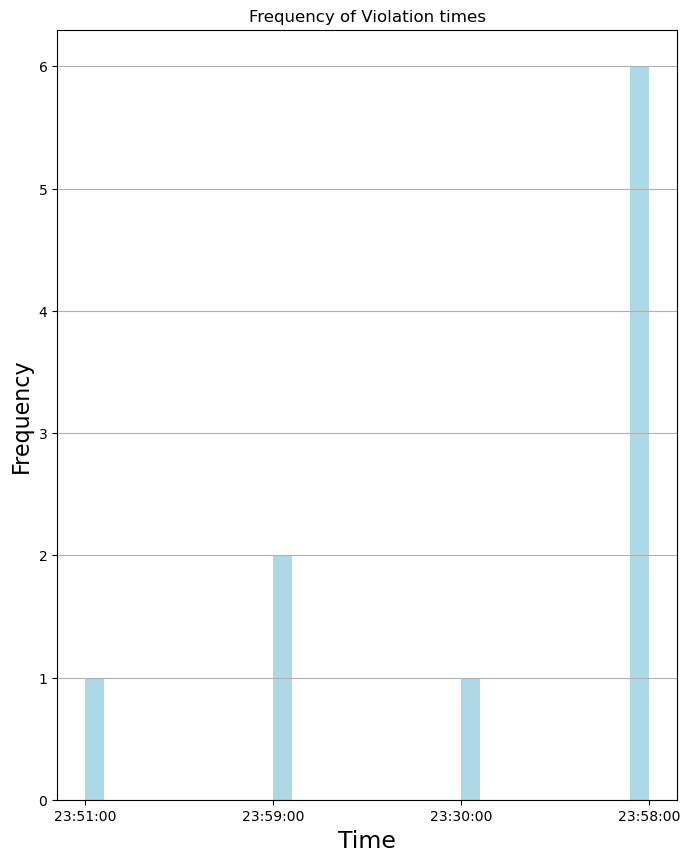

In [121]:
# create the figure
plt.figure(figsize=(8,10))

# create the histogram
plt.hist(time_stop, bins=30, histtype='barstacked', color='lightblue')

# create the labels
plt.title('Frequency of Violation times')
plt.xlabel('Time', fontsize=17)
plt.ylabel('Frequency', fontsize=16)
plt.grid(axis='y')

# save the image
plt.savefig('Histogram.png')

# show image
plt.show()